In [151]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


our dataset contains 5,610 entries with a single column named **reviews**, consisting of customer feedback on American Airlines passengers.

We want to perform **Sentiment** analysis on this dataset. Our agenda is as follows:

Sentiment Analysis Plan
1) Text Preprocess by cleaning the reviews by removing special characters, convert to lowercase
2) Sentiment Scoring by using **TextBlob** for polarity and subjectivity.
3) Classification by classifying sentiments as Positive, Neutral, or Negative.
4) Visualizations:
5) * Use Bar Plot for sentiment distribution
   * Use **Word Cloud** for **positive** vs. **negative reviews**


In [154]:
df = pd.read_csv('american-airlines.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  5610 non-null   object
dtypes: object(1)
memory usage: 44.0+ KB


,reviews
0,"✅ Trip Verified | Twice, delayed flights, plan..."
1,Not Verified | We flew from Jacksonville to B...
2,Not Verified | Terrible. My family and I were...
3,✅ Trip Verified | Worst experience ever. Flig...
4,✅ Trip Verified | Flight 703 CLT to BUF was d...


Now, I want to:
1) Clean my text
2) Sentiment score using TextBlob
3) Classification into positive, neutral, and negative
4) visualize and summarize

In [157]:
from textblob import TextBlob

In [159]:
# We want to clean the text, and then split it into training and testing sets.
def clean_text(text):
    # We need to remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Here, we convert the text to lowercase and strip whitespace
    text = text.lower().strip()
    return text

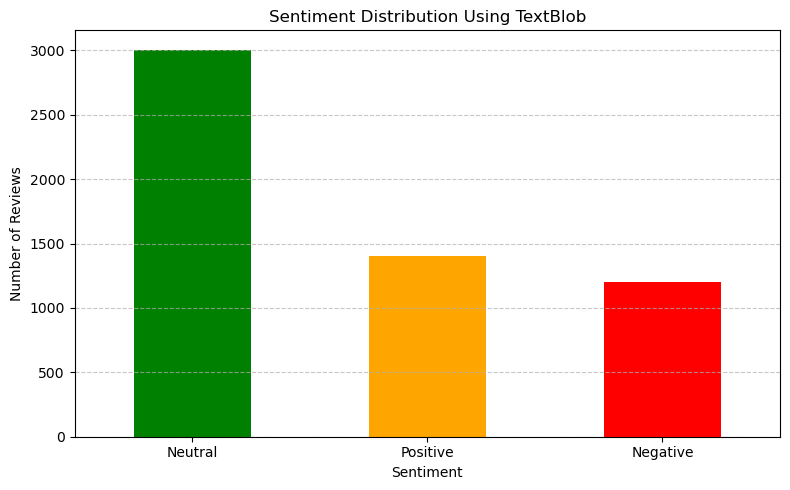

In [164]:
df["cleaned_reviews"] = df["reviews"].apply(clean_text)

# Here we apply TextBlob for sentiment scoring
df["polarity"] = df["cleaned_reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df["cleaned_reviews"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Step 3: Classify sentiment based on polarity
def classify_textblob_sentiment(p):
    if p > 0.1:
        return "Positive"
    elif p < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["polarity"].apply(classify_textblob_sentiment)

# Here we properly plot the sentiment distribution plot
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color=["green", "orange", "red"])
plt.title("Sentiment Distribution Using TextBlob")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

By the bar plot above, the **TextBlob-based sentiment distribution** of American Airlines, we see:
* **Neutral** reviews dominate the dataset
* **Positive** reviews come next
* **Negative** reviews are the least frequent

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [169]:
# Now, we build the pipeline and train the prediction model
model_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("clf", LogisticRegression(max_iter=1000))
])
model_pipeline.fit(X_train, y_train)

# Then, we evaluate the model
y_pred = model_pipeline.predict(X_test)
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
conf_matrix = confusion_matrix(y_test, y_pred)


conf_matrix

array([[100, 138,   3],
       [ 27, 541,  33],
       [  5, 136, 139]])

Now, we need to form our **Word Clouds**

In [172]:
from wordcloud import WordCloud

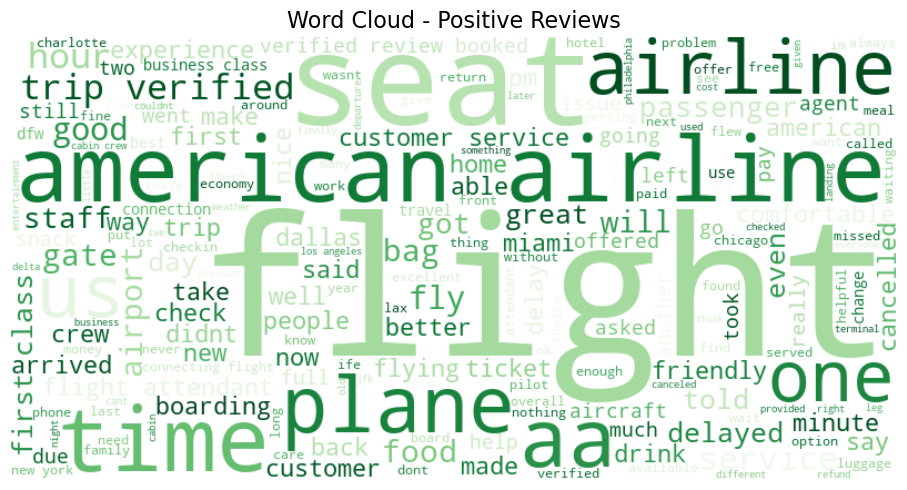

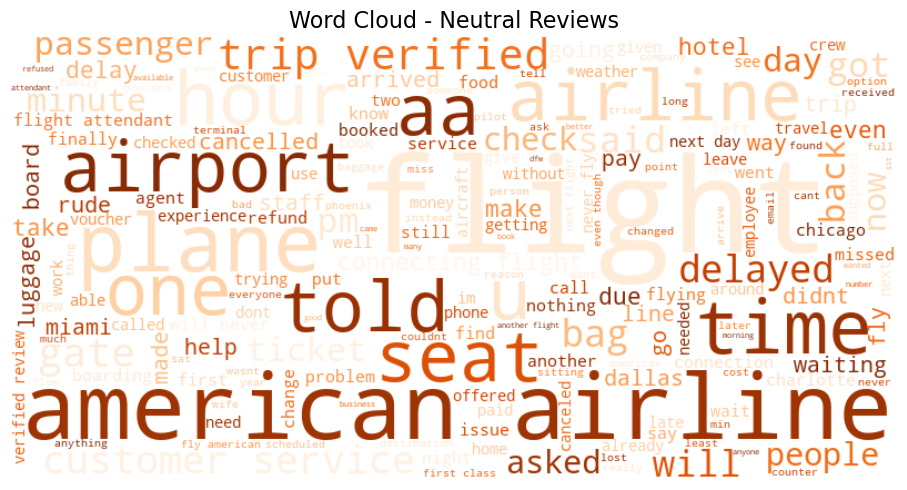

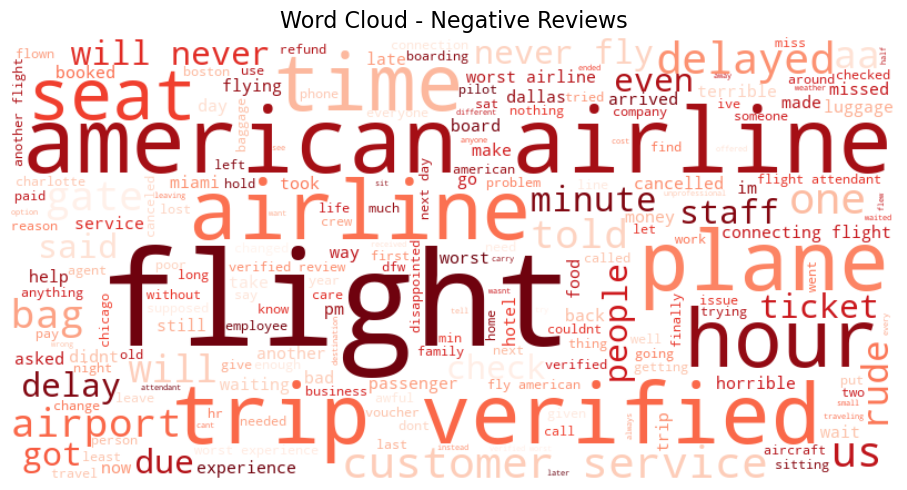

In [174]:
# We, we build our function to generate word cloud for a given sentiment
def generate_wordcloud(sentiment_label, color):
    text = " ".join(df[df["sentiment"] == sentiment_label]["cleaned_reviews"])
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=color).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment_label} Reviews", fontsize=16)
    plt.tight_layout()
    plt.show()

# Finally, we generate word clouds for each sentiment category
generate_wordcloud("Positive", "Greens")
generate_wordcloud("Neutral", "Oranges")
generate_wordcloud("Negative", "Reds")

Here are the word clouds for each sentiment category:
    •    Positive reviews highlight words like: flight, great, good, service, helpful, and staff.
    •    Neutral reviews center around: airport, ticket, plane, told, and gate—suggesting factual or mixed experiences.
    •    Negative reviews emphasize terms such as: delayed, rude, worst, customer service, and cancelled.

Here are the word clouds for each sentiment category:
* **Positive reviews** highlight words like: flight, great, good, service, helpful, and staff.
* **Neutral reviews** center around: airport, ticket, plane, told, and gate—suggesting factual or mixed experiences.
* **Negative reviews** emphasize terms such as: delayed, rude, worst, customer service, and cancelled.

In [178]:
from collections import Counter

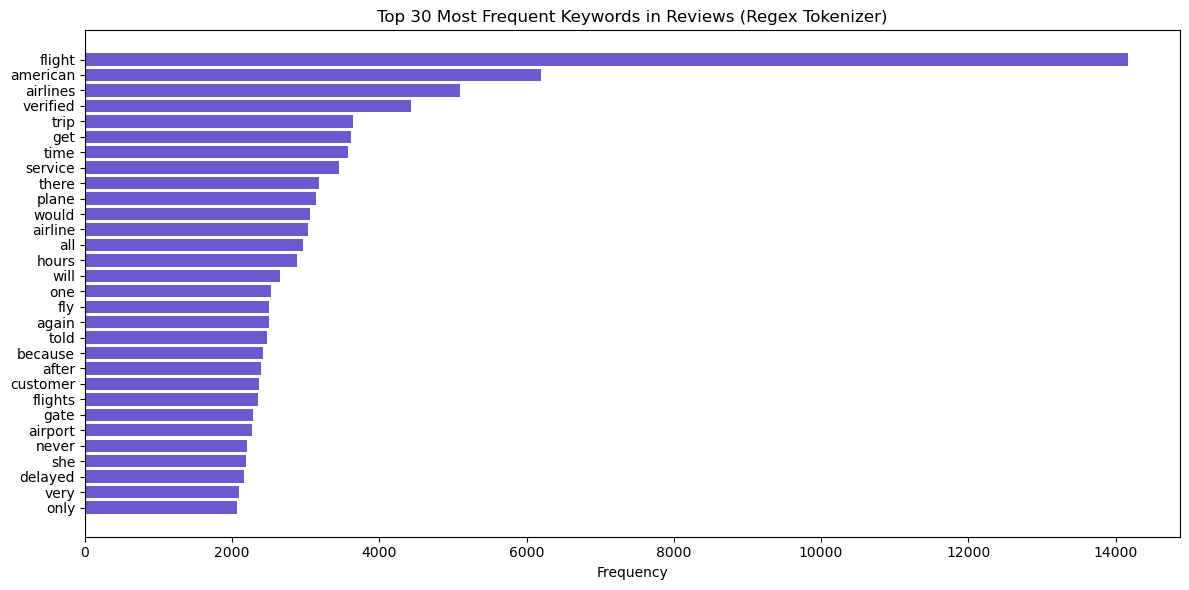

In [180]:
# Define a basic list of common English stopwords
basic_stopwords = {
    'the', 'and', 'to', 'of', 'a', 'in', 'for', 'is', 'on', 'that', 'with', 'it', 'this',
    'was', 'as', 'at', 'by', 'an', 'be', 'are', 'from', 'or', 'have', 'has', 'had', 'but',
    'not', 'my', 'they', 'we', 'you', 'me', 'our', 'so', 'if', 'their', 'them', 'were',
    'about', 'no', 'just', 'more', 'up', 'out', 'can', 'what', 'which', 'when', 'then'
}

# Reload dataset and clean it
file_path = "american-airlines.csv"
df = pd.read_csv(file_path)

def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", str(text))  # Remove special characters
    text = text.lower().strip()
    return text

df["cleaned_reviews"] = df["reviews"].apply(clean_text)

# Tokenize using regex
tokens = re.findall(r'\b\w+\b', " ".join(df["cleaned_reviews"]))

# Filter out stopwords and short words
filtered_words = [word for word in tokens if word not in basic_stopwords and len(word) > 2]

# Count and display top 30 keywords
word_freq = Counter(filtered_words)
top_keywords = word_freq.most_common(30)
keywords_df = pd.DataFrame(top_keywords, columns=["Keyword", "Frequency"])

# Plot
plt.figure(figsize=(12, 6))
plt.barh(keywords_df["Keyword"][::-1], keywords_df["Frequency"][::-1], color="slateblue")
plt.xlabel("Frequency")
plt.title("Top 30 Most Frequent Keywords in Reviews (Regex Tokenizer)")
plt.tight_layout()
plt.show()